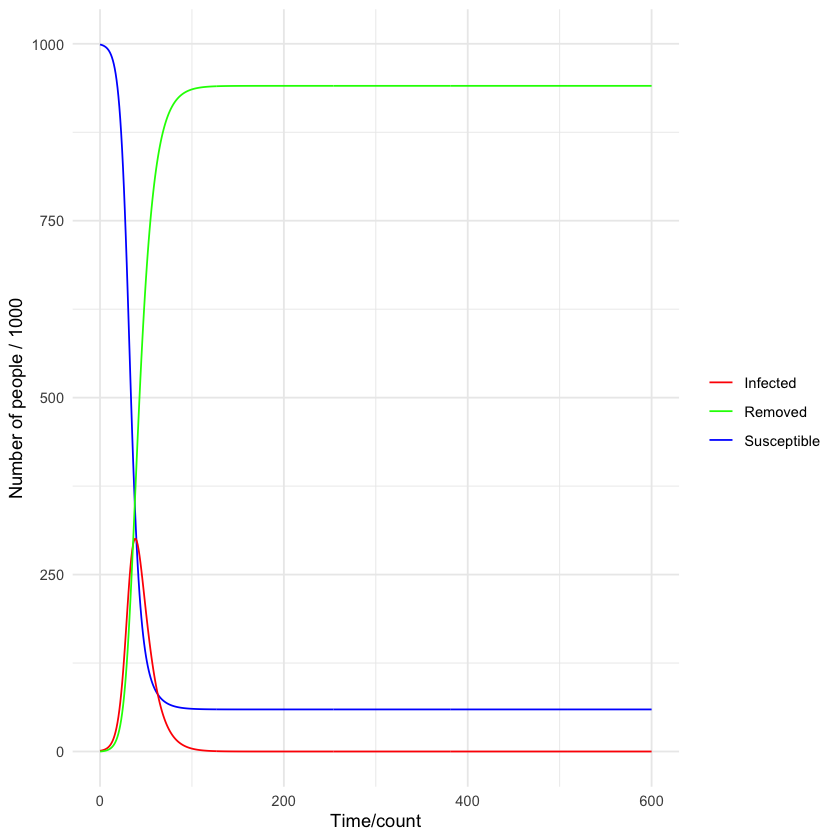

In [4]:
library(deSolve)
library(ggplot2)

# SIR model function
sir_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- -beta * S * I / N
    dI <- beta * S * I / N - gamma * I
    dR <- gamma * I
    return(list(c(dS, dI, dR)))
  })
}

# Set parameters
parameters <- c(beta = 0.3, gamma = 0.1)
state <- c(S = 999, I = 1, R = 0)
times <- seq(0, 600, by = 1)
N <- sum(state)

# Solve the differential equations
out <- ode(y = state, times = times, func = sir_model, parms = parameters)
df <- as.data.frame(out)

# Plot
ggplot(df, aes(x = time)) +
  geom_line(aes(y = S, color = "Susceptible")) +
  geom_line(aes(y = I, color = "Infected")) +
  geom_line(aes(y = R, color = "Removed")) +
  scale_color_manual(values = c("Susceptible" = "blue", "Infected" = "red", "Removed" = "green")) +
  labs(x = "Time/count", y = "Number of people / 1000", color = "") +
  theme_minimal() +
  theme(legend.position = "right")